# Tutorial on Multiflow Stream Mining 
This notebooks introduces some basic concepts of scikit-multiflow. This is a version of the MOA framework, which is currently adapted to python. 
This tutorial is by no means exhausting and does not lead a full understanding any aspect of scikit-multiflow. In particular this tutorial discusses the feautres which seem interesting from my viewpoint.
Official dokumentation at: https://scikit-multiflow.github.io/

# Installation 
1. Downlaod the scikit-multiflow: git clone https://github.com/scikit-multiflow/scikit-multiflow
2. (Windows) Create a new environment if needed. 
3. Install required packages
4. Go into source folder and run on command line: pip install -U .
5. For correct visual output on windows one should use %matplotlib notebook or %matplotlib ipympl

## Prepare notebook
Load general packages and set the matplotlib environment. 

In [1]:
%matplotlib notebook
import numpy as np

## Initialize stream 
A stream is an object in multiflow. For synthetic streams the objects has to be initialized. 
Multiflow supports a variety of synthetic streams. For real world datastream one is strongly encouraged to visit: https://moa.cms.waikato.ac.nz/datasets/ 

In [3]:
# Imports of various synthetic data streams
from skmultiflow.data.waveform_generator import WaveformGenerator
from skmultiflow.data.hyper_plane_generator import HyperplaneGenerator
from skmultiflow.data.random_rbf_generator import RandomRBFGenerator
# Create syntetic stream object
syn_stream = RandomRBFGenerator()

# Prepare stream for classification
# This includes reading the stream data from a file or creating the respective function
syn_stream.prepare_for_use()

print("------Key Numbers of stream------\n")
# Print a list of features 
print("Features of the stream:")
features_names = syn_stream.feature_names
print(features_names)
print("\nLabels of the stream")
target_names = syn_stream.target_names
print(target_names)

# Print remeaining examples
print("\nRemaining examples")
remaining_samples = syn_stream.n_remaining_samples()
print(remaining_samples) if remaining_samples != -1 else print("Indefinite Stream")

------Key Numbers of stream------

Features of the stream:
['att_num_0', 'att_num_1', 'att_num_2', 'att_num_3', 'att_num_4', 'att_num_5', 'att_num_6', 'att_num_7', 'att_num_8', 'att_num_9']

Labels of the stream
['target_0']

Remaining examples
Indefinite Stream


## Sample from stream

Sample from Stream to get overview of data structure. Every stream sample is an nested array constructed of featuers and target. Both features and target are arrays itself, depending on batch size. The first is a matrix of feauters and every row containing a new data point. The labels for every data point are listed in the target array.

In [4]:
batch_size = 2
number_batches = 10
samples = []
print("\n-----Start of stream sampling-----\n")
for n in range(number_batches):
    sample = syn_stream.next_sample(batch_size=batch_size)
    samples.append(sample)
    print(sample)
print("\n-----End of sampling-----")


-----Start of stream sampling-----

(array([[ 0.64976216,  0.11345275,  0.33721281,  1.21733588,  0.71866909,
        -0.11878224,  0.78922507,  0.4487363 ,  0.68869977,  0.23237196],
       [ 0.68175047,  0.30822047,  0.78261   ,  0.45450746,  0.33317392,
         0.55241981,  0.16977745,  0.38280286,  0.59705968,  0.64934233]]), array([0., 1.]))
(array([[0.40917919, 0.77180734, 0.72904467, 0.92976646, 0.36382402,
        0.73634948, 0.34296856, 0.3850602 , 0.92586796, 0.43052449],
       [0.45156463, 0.75935838, 0.37136277, 0.56497128, 0.0996484 ,
        0.38960384, 0.36492368, 0.42428811, 0.09634336, 0.6482266 ]]), array([0., 0.]))
(array([[0.41846675, 0.1407173 , 0.74453428, 0.29985468, 0.84456765,
        0.06022535, 0.67370052, 0.25765364, 0.08914545, 0.72249385],
       [0.91281249, 0.24570884, 0.72047396, 0.70520424, 0.26869291,
        0.58581336, 0.50124162, 0.94617102, 0.22204048, 0.11268075]]), array([0., 1.]))
(array([[ 0.01883699,  0.81688082,  0.06625047,  0.11492855, 

## Acces Stream data structure
As pointed out above, the data structure is rather complex. In the next cell the data is split up and described. Further concepts at: https://scikit-multiflow.github.io/scikit-multiflow/user-guide.core-concepts.stream-class.html

In [5]:

print("\n-----Access of stream data structure-----")

print("\nAccess first batch of batch array, features and labels organized seperatly")
print(samples[0])
print("\n Access features samples")
print(samples[0][0])
print("\nAccess first sample array")
print(samples[0][0][0])
print("\nAccess first integer sample")
print(samples[0][0][0][0])
print("\n-------------------")
print("\nAccess label array with length of batch size")
print(samples[0][1])
print("\nAccess first label in array corrosponding to first sample")
print(samples[0][1][0])
def incrementalMean(X):
    return 0


-----Access of stream data structure-----

Access first batch of batch array, features and labels organized seperatly
(array([[ 0.64976216,  0.11345275,  0.33721281,  1.21733588,  0.71866909,
        -0.11878224,  0.78922507,  0.4487363 ,  0.68869977,  0.23237196],
       [ 0.68175047,  0.30822047,  0.78261   ,  0.45450746,  0.33317392,
         0.55241981,  0.16977745,  0.38280286,  0.59705968,  0.64934233]]), array([0., 1.]))

 Access features samples
[[ 0.64976216  0.11345275  0.33721281  1.21733588  0.71866909 -0.11878224
   0.78922507  0.4487363   0.68869977  0.23237196]
 [ 0.68175047  0.30822047  0.78261     0.45450746  0.33317392  0.55241981
   0.16977745  0.38280286  0.59705968  0.64934233]]

Access first sample array
[ 0.64976216  0.11345275  0.33721281  1.21733588  0.71866909 -0.11878224
  0.78922507  0.4487363   0.68869977  0.23237196]

Access first integer sample
0.6497621591554521

-------------------

Access label array with length of batch size
[0. 1.]

Access first lab

# Evaluation process of classifer on streams
The below cell will initialize the HoeffingTree classifer and evaluates it with prequential evaluation on the stream. 
    1. The EvaluatePrequential predefines the test setting and evaluate(...) starts the test run.
    2. evaluate(...) manages metrics and plots
    3. Further calls the predict(...) function of the classifier object and the partial_fit(...).
NOTE: Point 3 is only valid in the Prequential mode. Other evaluation techniques may handle it different.<br>
The process is shown in the figure below.
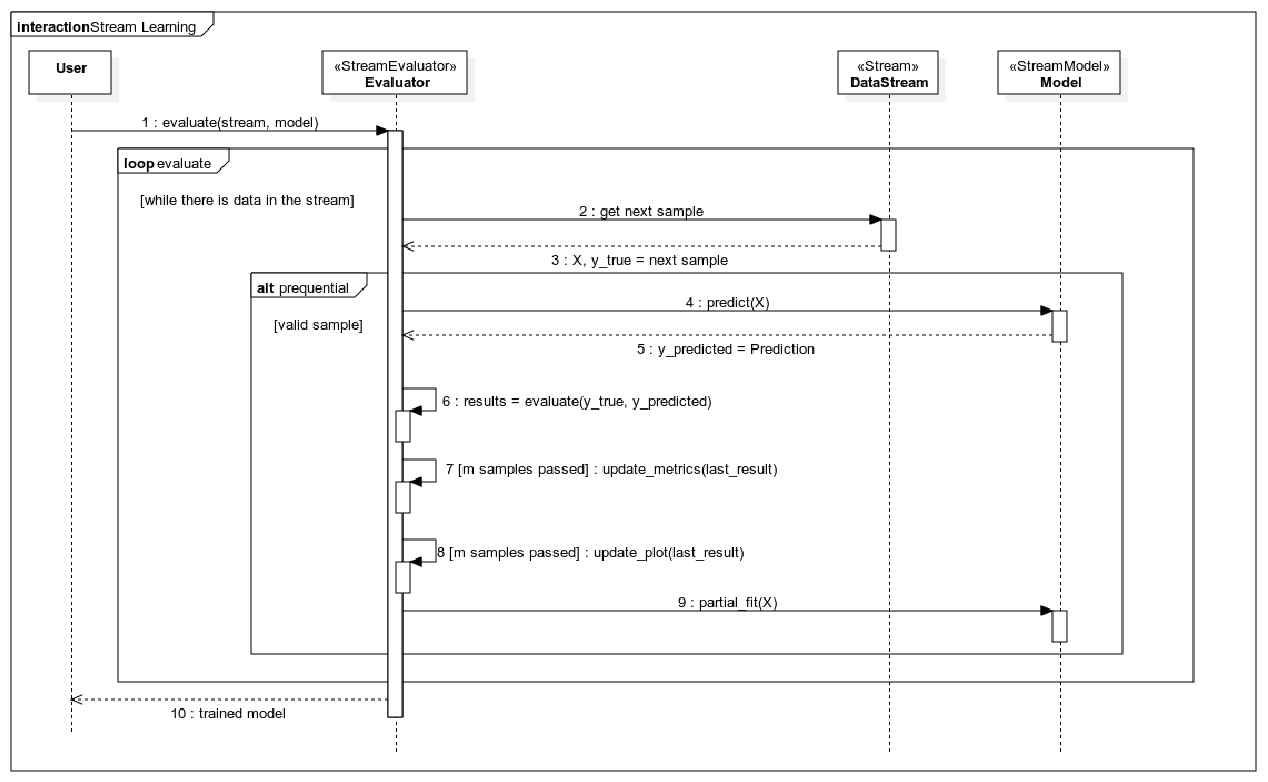
(Source: https://scikit-multiflow.github.io/scikit-multiflow/user-guide.core-concepts.architecture.html)

## Initialise classifier and evaluate
First set up an instance of classifier object followed by valuation object. Call evaluate and pass stream (from above) and classifier objects to function.

<IPython.core.display.Javascript object>


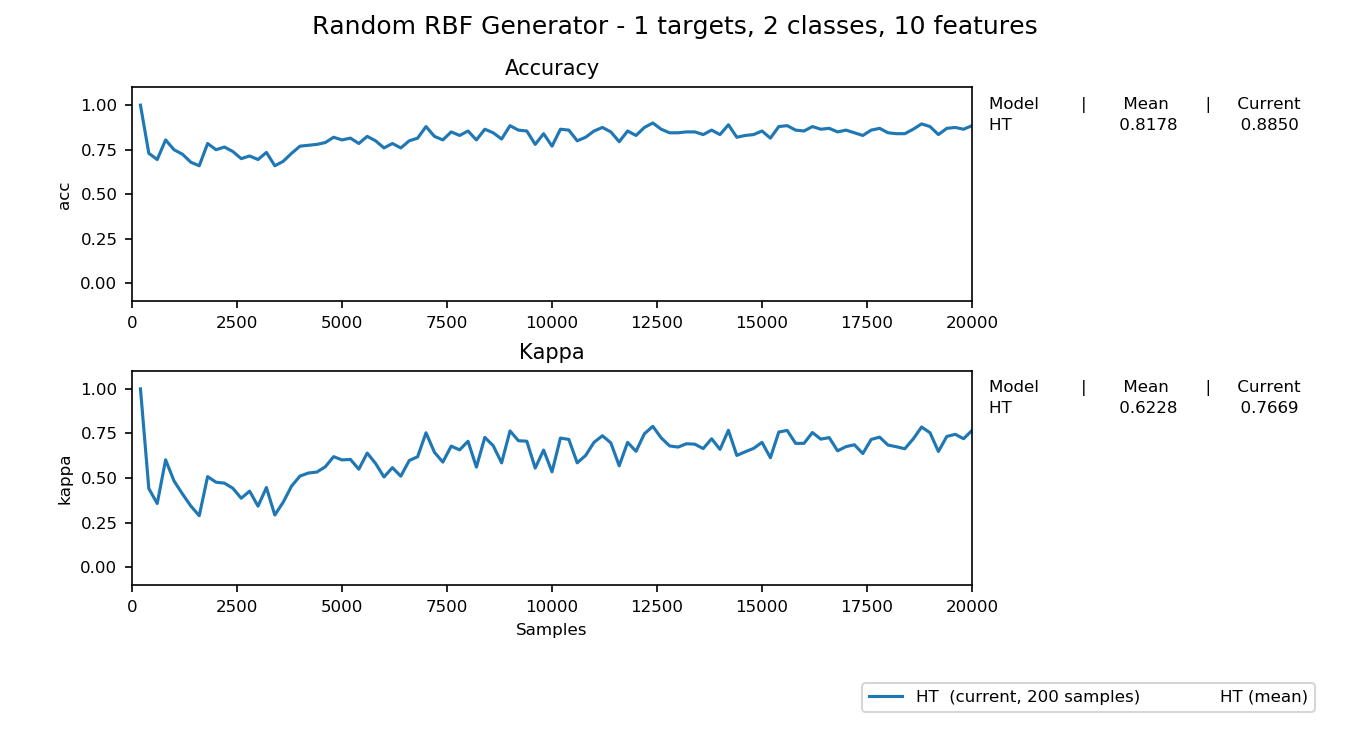

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [9.37s]
Processed samples: 20000
Mean performance:
HT - Accuracy     : 0.8178
HT - Kappa        : 0.6228


In [7]:
from skmultiflow.trees.hoeffding_tree import HoeffdingTree
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential

# 1. Instantiate the HoeffdingTree classifier
ht = HoeffdingTree()

# 2. Setup the evaluator
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=20000)

# 3. Run evaluation
evaluator.evaluate(stream=syn_stream, model=ht,model_names=["HT"])

## Comparison of two classifier on a stream
The comparison of two classifier is possible due to the use of pipelines. First initialise both classifier object. Followed by creating the pipeline. Finally and straightforward use the classifier pipeline as model in evaluate().

<IPython.core.display.Javascript object>


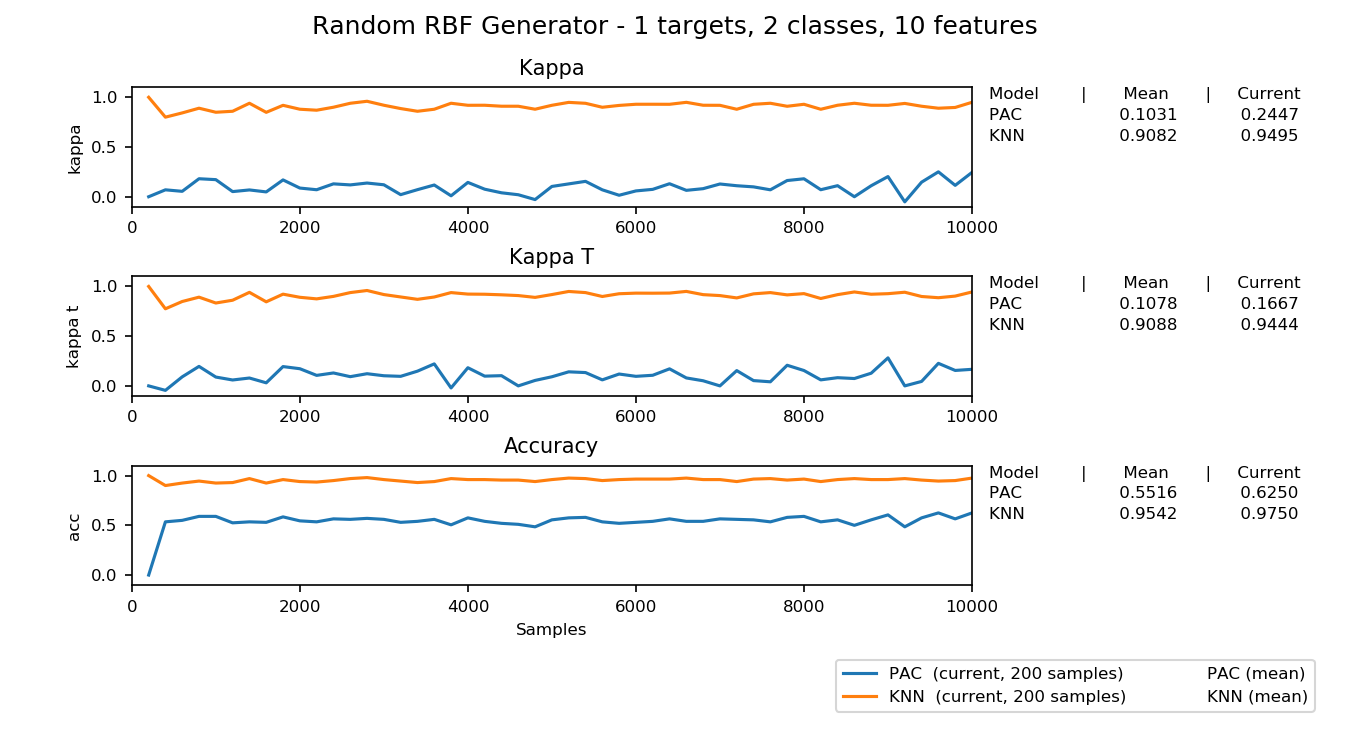

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [95.52s]
Processed samples: 10000
Mean performance:
PAC - Accuracy     : 0.5516
PAC - Kappa        : 0.1031
PAC - Kappa T      : 0.1078
KNN - Accuracy     : 0.9542
KNN - Kappa        : 0.9082
KNN - Kappa T      : 0.9088


In [18]:
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from skmultiflow.lazy.knn_adwin import KNNAdwin
from skmultiflow.core.pipeline import Pipeline
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential

clf_one = PassiveAggressiveClassifier()
clf_two = KNNAdwin()
# Setup the pipeline for clf_one
pipe = Pipeline([('Classifier', clf_one)])
# Create the list to hold both classifiers
classifier = [pipe, clf_two]
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=200, max_samples=10000, batch_size=1, n_wait=200, max_time=1000, show_plot=True, metrics=['kappa', 'kappa_t', 'accuracy'])
# Evaluate
evaluator.evaluate(stream=syn_stream, model=classifier,model_names=['PAC','KNN'])


## Concept drift Detection with Adaptive Sliding Window 
Concept drift adation technique by Bifet et. al discussed in the paper "Learning from Time-Changing Data with Adaptive Windowing".<br>
Compares statistics of two windows and detects if theses two windows are different to some point

In [16]:
from skmultiflow.data.random_rbf_generator_drift import RandomRBFGeneratorDrift
from skmultiflow.drift_detection.adwin import ADWIN
import sys
import numpy as np

# 1. Create adwin object
adwin = ADWIN(delta=0.9)

# 2. Create synthetic datastream based on gaussian random numbers with drastic change of mean
m1 = 0
m2 = 5
stream_size = 2000

stream = np.random.normal(m1, 1, round(stream_size/2))
drift = np.random.normal(m2,1,round(stream_size/2))
stream = np.concatenate([stream,drift])


# 3. Process stream
for i in range(len(stream)):
    
    # Get new sample
    adwin.add_element(stream[i])
    
    print("\rIteration {}".format(i+1),end="")
    sys.stdout.flush()
    
    #Detect change
    if adwin.detected_change():
        print(" -- Change detected") 

Iteration 224 -- Change detected
Iteration 1024 -- Change detected
Iteration 1056 -- Change detected
Iteration 1088 -- Change detected
Iteration 2000

## Classifier with integrated ADWIN concept drift detect vs baseline
Some classifier of multiflow have already an ADWIN concept drift detect as built in function. The next cell demonstrate the function with respect to performance against a baseline approach 

<IPython.core.display.Javascript object>


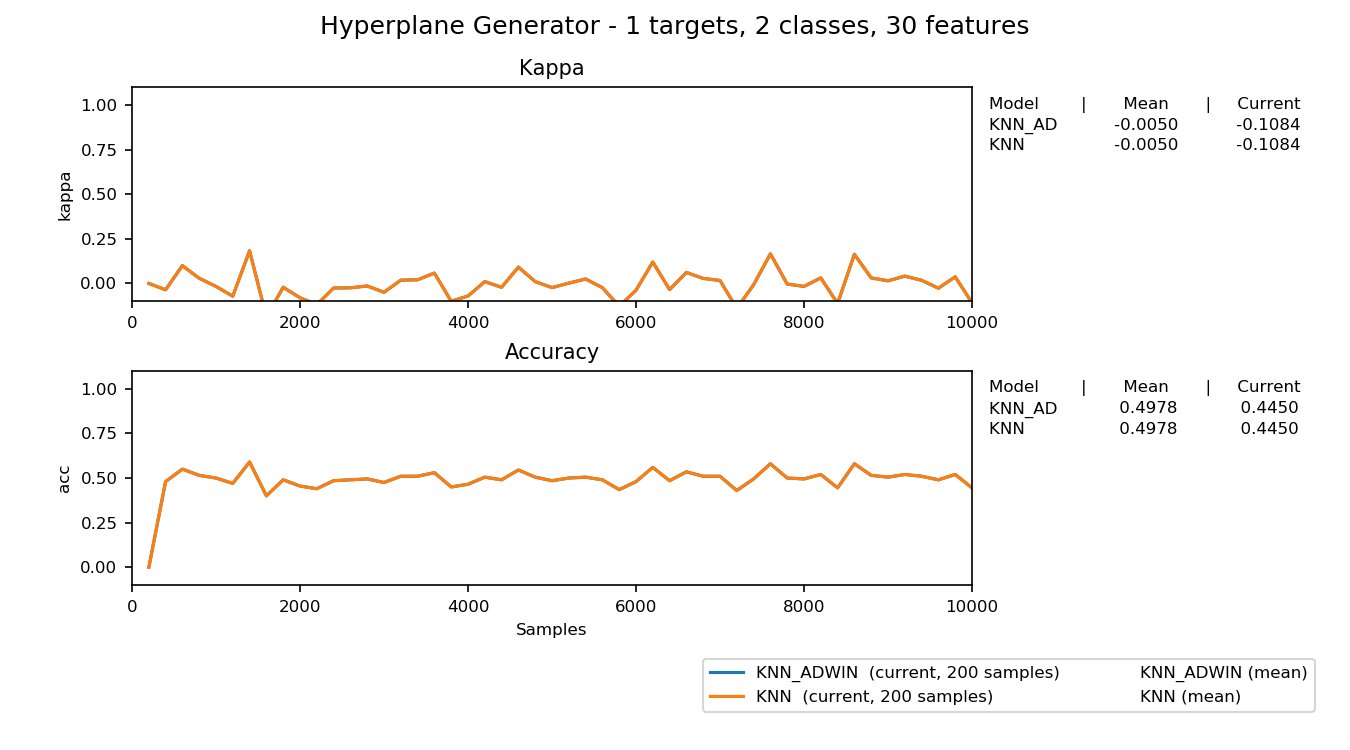

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [76.12s]
Processed samples: 10000
Mean performance:
KNN_ADWIN - Accuracy     : 0.4978
KNN_ADWIN - Kappa        : -0.0050
KNN - Accuracy     : 0.4978
KNN - Kappa        : -0.0050


In [15]:
from skmultiflow.lazy.knn_adwin import KNNAdwin
from skmultiflow.lazy.knn import KNN
from skmultiflow.data.hyper_plane_generator import HyperplaneGenerator

#Create synthetic datastream
stream = HyperplaneGenerator(n_features=30, n_drift_features=15,sigma_percentage=0.8,noise_percentage=.5)
stream.prepare_for_use()

knn_adwin = KNNAdwin( leaf_size=40, max_window_size=2000)
knn = KNN(leaf_size=40, max_window_size=2000)

pipe = Pipeline([('Classifier', knn_adwin)])
# Create the list to hold both classifiers
classifier = [pipe, knn]
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=200, max_samples=10000, batch_size=1, n_wait=200, max_time=1000, show_plot=True, metrics=['kappa', 'accuracy'])
# Evaluate
evaluator.evaluate(stream=stream, model=classifier,model_names=['KNN_ADWIN','KNN'])

## Evaluation of classifier on real world datastream
In this example the classifier Adaptive Hoeffding Tree is tested on a real world datastream. This also demonstrates the function to load data from file system into multiflow. The use of classifiers is straightforward in comparison to synthetic datasets.

<IPython.core.display.Javascript object>


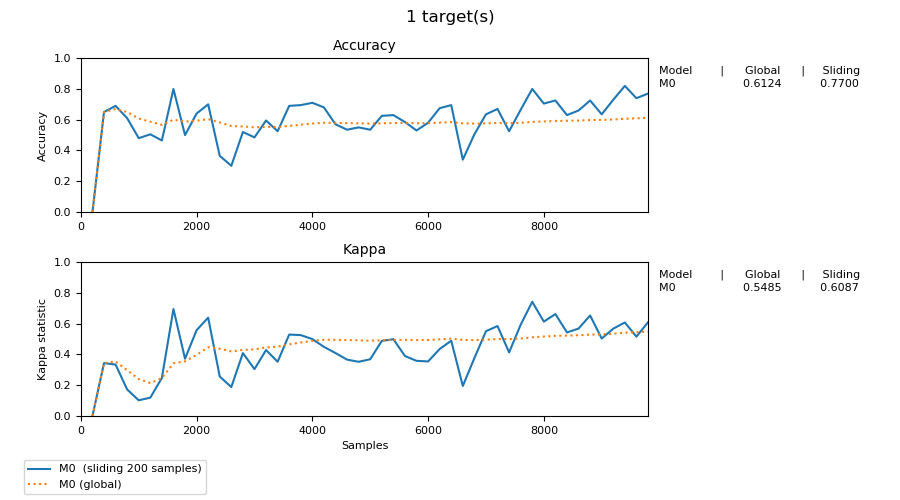

root - INFO - Prequential Evaluation
root - INFO - Evaluating 1 target(s).
root - INFO - Pre-training on 200 samples.
root - INFO - Evaluating...
root - INFO - 5.0%
root - INFO - 10.0%
root - INFO - 15.0%
root - INFO - 20.0%
root - INFO - 25.0%
root - INFO - 30.0%
root - INFO - 35.0%
root - INFO - 40.0%
root - INFO - 45.0%
root - INFO - 50.0%
root - INFO - 55.0%
root - INFO - 60.0%
root - INFO - 65.0%
root - INFO - 70.0%
root - INFO - 75.0%
root - INFO - 80.0%
root - INFO - 85.0%
root - INFO - 90.0%
root - INFO - 95.0%
root - INFO - Evaluation time: 44.854 s
root - INFO - Total samples: 10000
root - INFO - Global performance:
root - INFO - M0 - Accuracy     : 0.616
root - INFO - M0 - Kappa        : 0.553


In [5]:
import pandas as pd 
from skmultiflow.data.data_stream import DataStream
from skmultiflow.data.file_stream import FileStream
from skmultiflow.classification.trees.hoeffding_adaptive_tree import HAT
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
from skmultiflow.data.data_stream import DataStream

# 1. Download covtype dataset from github scitkit-multiflow repository
data = pd.read_csv("https://raw.githubusercontent.com/scikit-multiflow/scikit-multiflow/master/src/skmultiflow/data/datasets/covtype.csv")

# 2. Split data in data points and labels
y = data.iloc[:,-1:]
x = data.iloc[:,:-1]

# 3. Create stream object and load data into object
stream = DataStream(data=x,y=y)
stream.prepare_for_use()

# 4.Create classifier object  
ht = HAT()

# 5. Evaluate classifier on stream
evaluator = EvaluatePrequential(pretrain_size=200, max_samples=10000, batch_size=1, n_wait=200, max_time=1000,
output_file='result_covtype.csv', show_plot=True, metrics=['kappa', 'performance'])

evaluator.evaluate(stream=stream, model=ht)